In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


df = pd.read_csv(r"marketing_campaign.csv", sep="\t")

print("\n===== First 5 Rows =====")
print(df.head())
print("\n===== Last 5 Rows =====")
print(df.tail())

print("\n===== Dataset Info =====")
print(df.info())

print("\n===== Descriptive Statistics =====")
print(df.describe(include='all'))



===== First 5 Rows =====
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  C

In [2]:

# -------------------------
# 2. Dataset shape
# -------------------------
print("\n===== Dataset Shape =====")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

print("\n===== Checking Missing Values Before Dropping =====")
missing_per_column = df.isnull().sum()
total_missing = missing_per_column.sum()
print(f"\nTotal missing values in dataset: {total_missing}")

missing_percentage = (missing_per_column / df.shape[0]) * 100
missing_df = pd.DataFrame({
    "Missing Values": missing_per_column,
    "Percentage (%)": missing_percentage.round(2)
})
print("\nMissing values per column with percentage:")
print(missing_df)



===== Dataset Shape =====
Rows: 2240
Columns: 29

===== Checking Missing Values Before Dropping =====

Total missing values in dataset: 24

Missing values per column with percentage:
                     Missing Values  Percentage (%)
ID                                0            0.00
Year_Birth                        0            0.00
Education                         0            0.00
Marital_Status                    0            0.00
Income                           24            1.07
Kidhome                           0            0.00
Teenhome                          0            0.00
Dt_Customer                       0            0.00
Recency                           0            0.00
MntWines                          0            0.00
MntFruits                         0            0.00
MntMeatProducts                   0            0.00
MntFishProducts                   0            0.00
MntSweetProducts                  0            0.00
MntGoldProds                      0 

In [3]:

# -------------------------
# 3. Dropping rows with any null value (as in original)
# -------------------------
print("\n===== Dropping Rows with Null Values =====")
df = df.dropna()
missing_after_drop = df.isnull().sum().sum()
print(f"Total missing values after dropping rows: {missing_after_drop}")

print("\n===== Checking Dataset Shape After Dropping =====")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")



===== Dropping Rows with Null Values =====
Total missing values after dropping rows: 0

===== Checking Dataset Shape After Dropping =====
Rows: 2216
Columns: 29


In [4]:

# -------------------------
# 4. Data types and categorical value checks
# -------------------------
print("===== Data Types and Format Consistency =====\n")
print("Data types of each column:")
print(df.dtypes)

print("\nChecking categorical columns consistency (unique values):")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    unique_values = df[col].unique()
    print(f"\nColumn '{col}' - {len(unique_values)} unique values:")
    print(unique_values[:10], "...")  # first 10 only

print("\nChecking numeric columns consistency:")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    non_numeric = pd.to_numeric(df[col], errors='coerce').isna().sum()
    print(f"Column '{col}' - non-numeric values count: {non_numeric}")


===== Data Types and Format Consistency =====

Data types of each column:
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Checking cat

In [5]:

# -------------------------
# 5. Create Age column from Year_Birth safely
# -------------------------
df.loc[:, 'Age'] = 2025 - df['Year_Birth']
print("\nAdded 'Age' column (2025 - Year_Birth).")
print(df[['Year_Birth', 'Age']].head())



Added 'Age' column (2025 - Year_Birth).
   Year_Birth  Age
0        1957   68
1        1954   71
2        1965   60
3        1984   41
4        1981   44


In [6]:
# -------------------------
# 7. Categorical Cleaning
# -------------------------
# Simplify Marital_Status
df['Marital_Status'] = df['Marital_Status'].replace({
    'Married': 'Partner',
    'Together': 'Partner',
    'Absurd': 'Alone',
    'Widow': 'Alone',
    'YOLO': 'Alone',
    'Divorced': 'Alone',
    'Single': 'Alone'
})

print("\n===== Marital Status Distribution after Cleaning =====")
print(df['Marital_Status'].value_counts())



===== Marital Status Distribution after Cleaning =====
Marital_Status
Partner    1430
Alone       786
Name: count, dtype: int64


In [7]:
# -------------------------
# 8. Outlier Handling
# -------------------------
# Age < 100
df = df[df['Age'] < 100]
# Income < 600000
df = df[df['Income'] < 600000]

print("\n===== Shape after removing outliers =====")
print(df.shape)



===== Shape after removing outliers =====
(2212, 30)


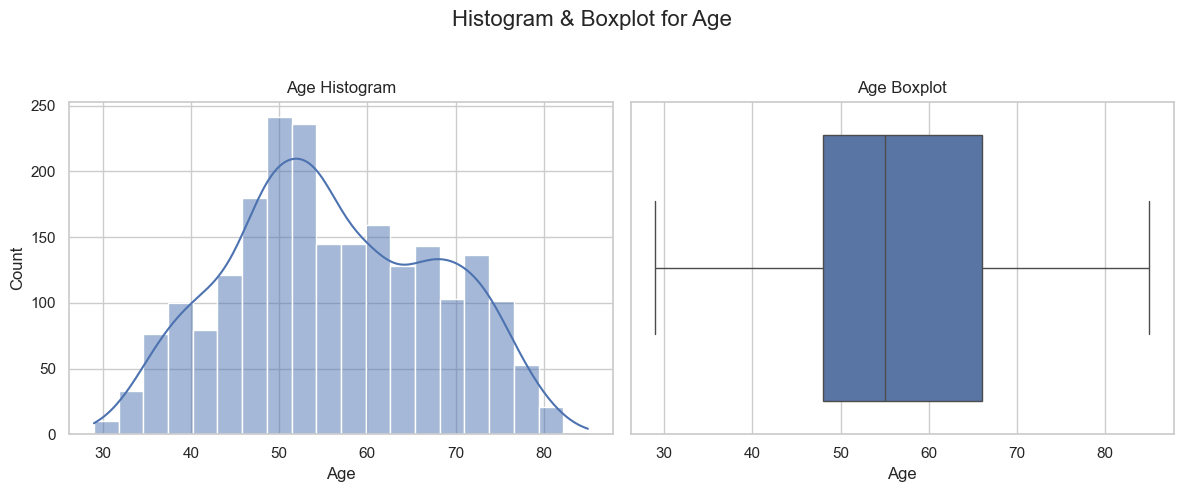


[Explanation] عرضنا التوزيع والـboxplot لـ'Age' لنتعرف على التشتت، القيم المتطرفة (outliers)، وطبيعة التوزيع — مفيد لاختيار طرق المعالجة أو التكتل لاحقًا.


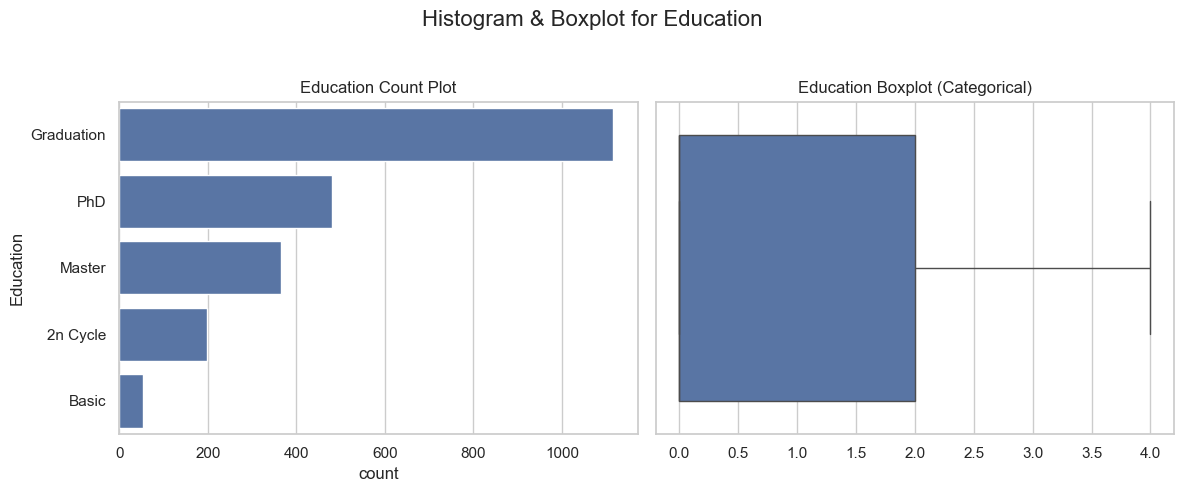


[Explanation] عرضنا التوزيع والـboxplot لـ'Education' لنتعرف على التشتت، القيم المتطرفة (outliers)، وطبيعة التوزيع — مفيد لاختيار طرق المعالجة أو التكتل لاحقًا.


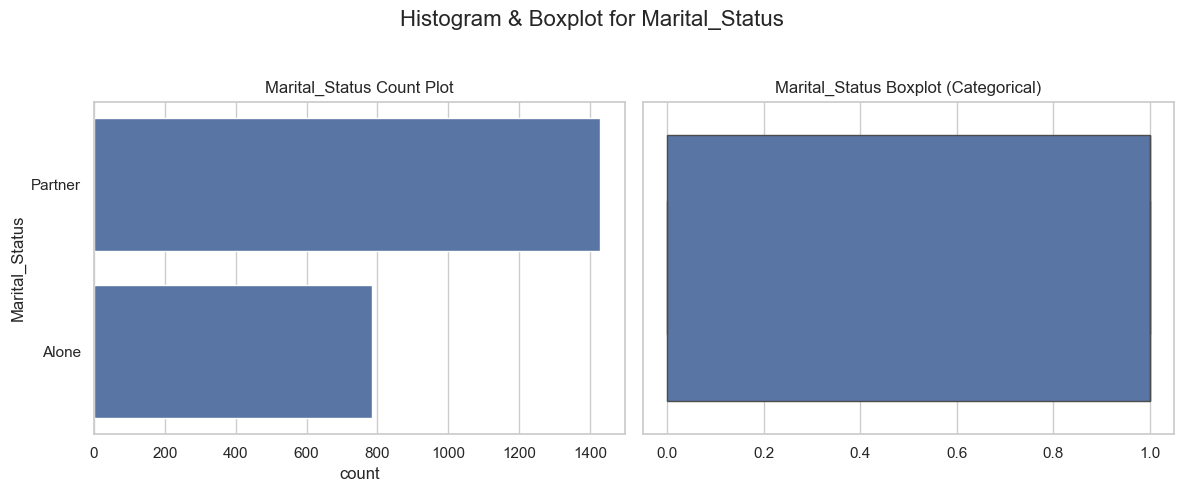


[Explanation] عرضنا التوزيع والـboxplot لـ'Marital_Status' لنتعرف على التشتت، القيم المتطرفة (outliers)، وطبيعة التوزيع — مفيد لاختيار طرق المعالجة أو التكتل لاحقًا.


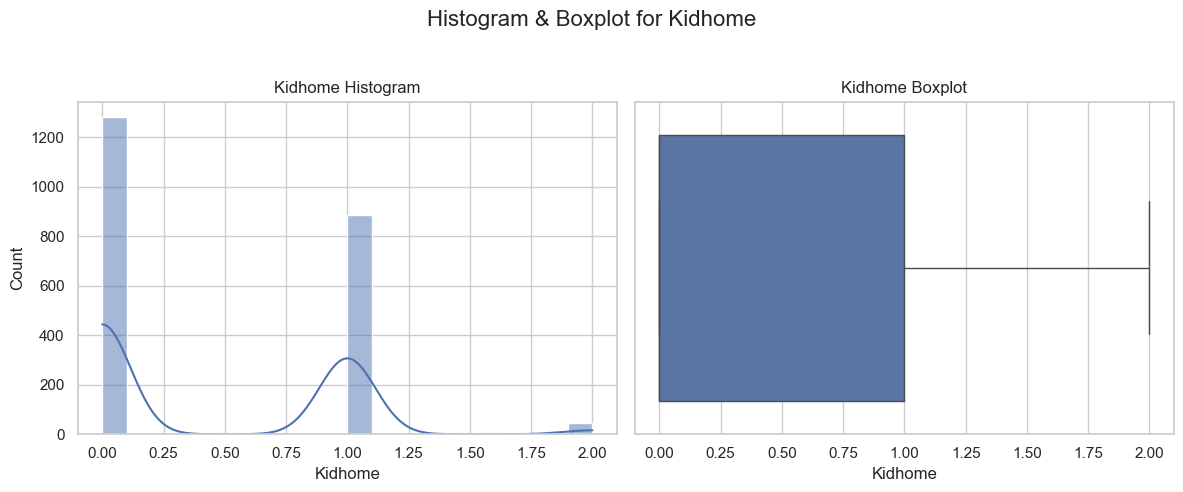


[Explanation] عرضنا التوزيع والـboxplot لـ'Kidhome' لنتعرف على التشتت، القيم المتطرفة (outliers)، وطبيعة التوزيع — مفيد لاختيار طرق المعالجة أو التكتل لاحقًا.


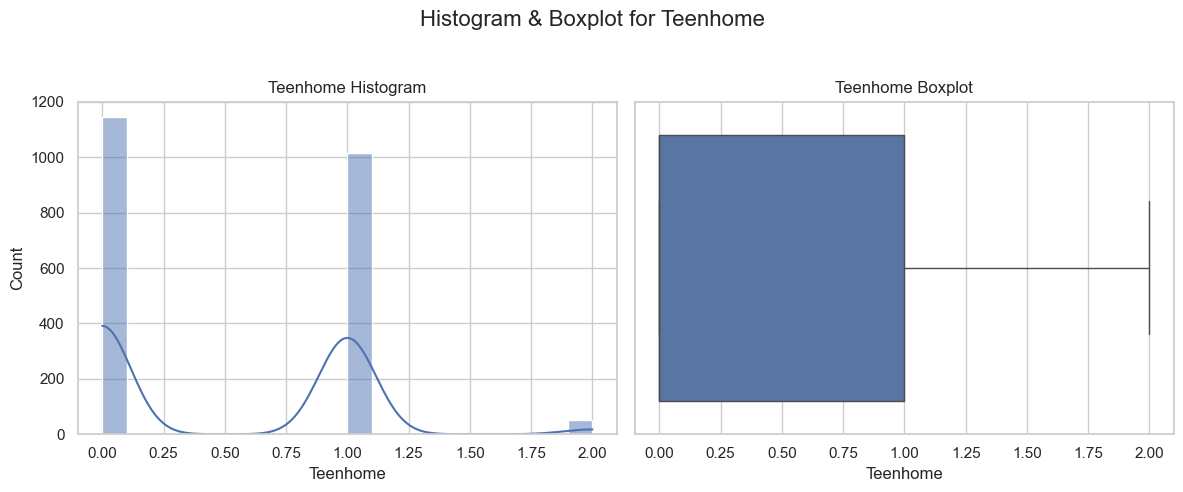


[Explanation] عرضنا التوزيع والـboxplot لـ'Teenhome' لنتعرف على التشتت، القيم المتطرفة (outliers)، وطبيعة التوزيع — مفيد لاختيار طرق المعالجة أو التكتل لاحقًا.


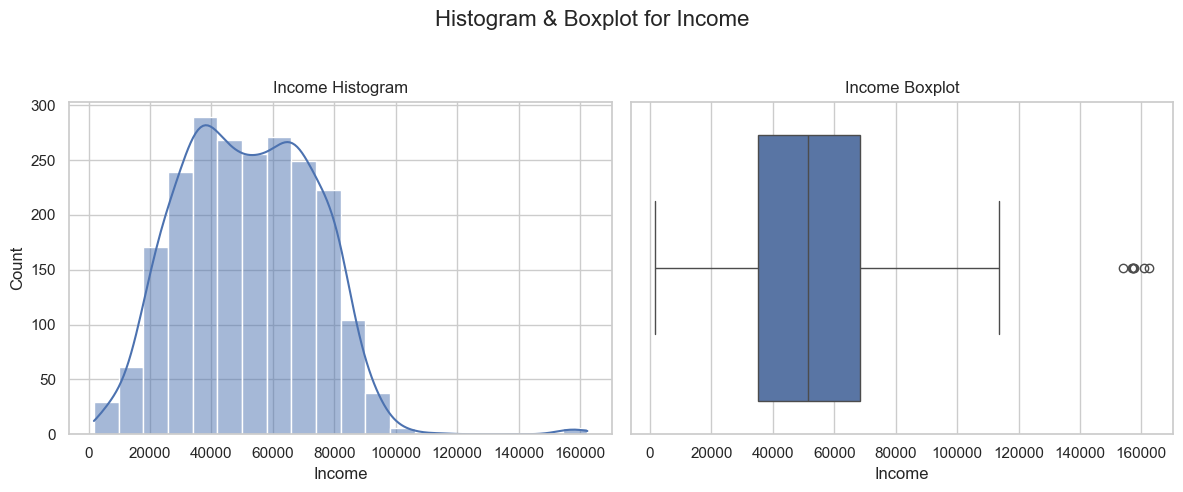


[Explanation] عرضنا التوزيع والـboxplot لـ'Income' لنتعرف على التشتت، القيم المتطرفة (outliers)، وطبيعة التوزيع — مفيد لاختيار طرق المعالجة أو التكتل لاحقًا.


In [8]:

# -------------------------
# 6. Exploratory visualizations for demographic features
# -------------------------
demographic_cols = ['Age', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Income']

sns.set(style="whitegrid")

for col in demographic_cols:
    plt.figure(figsize=(12,5))
    plt.suptitle(f"Histogram & Boxplot for {col}", fontsize=16)
    
    if col in df.select_dtypes(include=['int64', 'float64']).columns:
        plt.subplot(1,2,1)
        sns.histplot(df[col], bins=20, kde=True)
        plt.title(f"{col} Histogram")
        plt.xlabel(col)
        plt.ylabel("Count")
        
        plt.subplot(1,2,2)
        sns.boxplot(x=df[col])
        plt.title(f"{col} Boxplot")
    else:
        plt.subplot(1,2,1)
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f"{col} Count Plot")
        
        plt.subplot(1,2,2)
        sns.boxplot(x=pd.factorize(df[col])[0])
        plt.title(f"{col} Boxplot (Categorical)")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Explanation printed after each figure
    print(f"\n[Explanation] عرضنا التوزيع والـboxplot لـ'{col}' لنتعرف على التشتت، القيم المتطرفة (outliers)، وطبيعة التوزيع — مفيد لاختيار طرق المعالجة أو التكتل لاحقًا.")


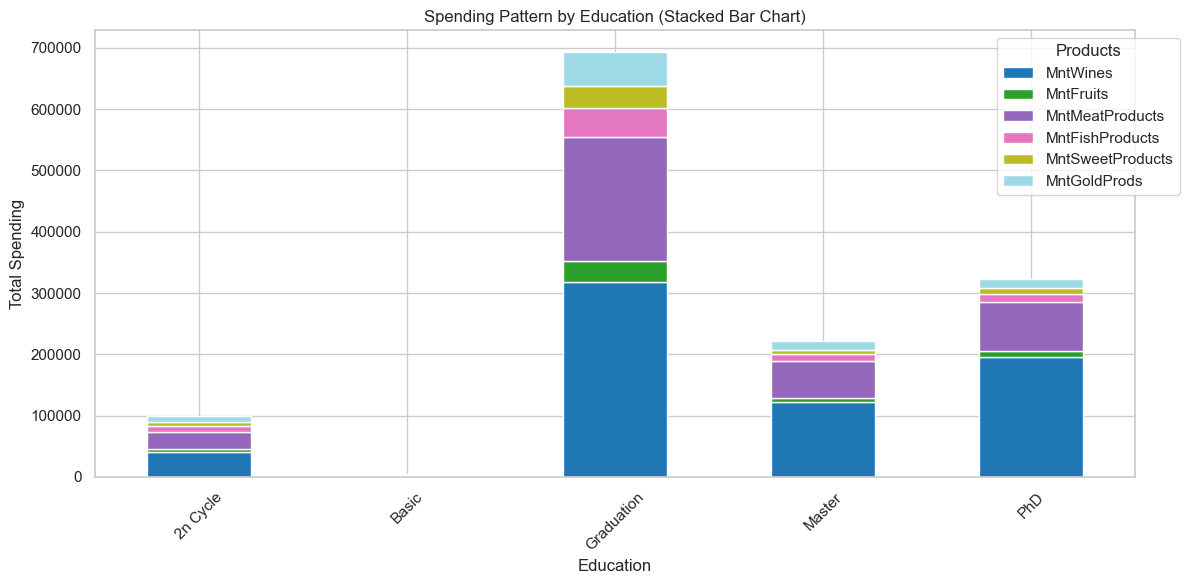


[Explanation] المخططات المتكدسة تبين كيف يتوزع الإنفاق على فئات المنتجات داخل كل فئة من 'Education' — يساعد في فهم أي مجموعات تنفق أكثر وأين نستهدف الحملات.


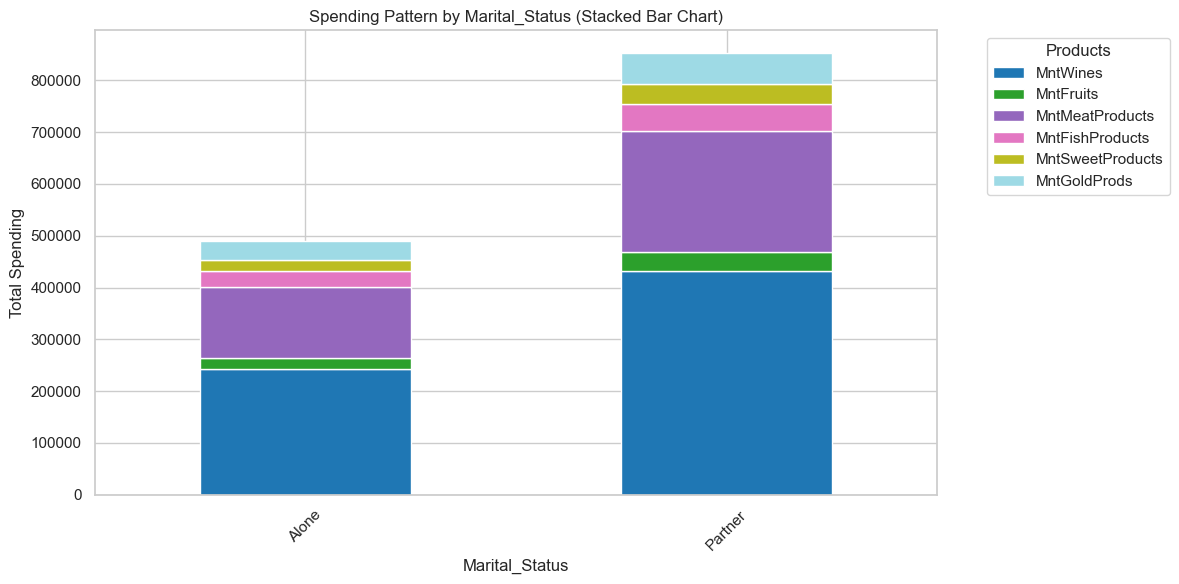


[Explanation] المخططات المتكدسة تبين كيف يتوزع الإنفاق على فئات المنتجات داخل كل فئة من 'Marital_Status' — يساعد في فهم أي مجموعات تنفق أكثر وأين نستهدف الحملات.


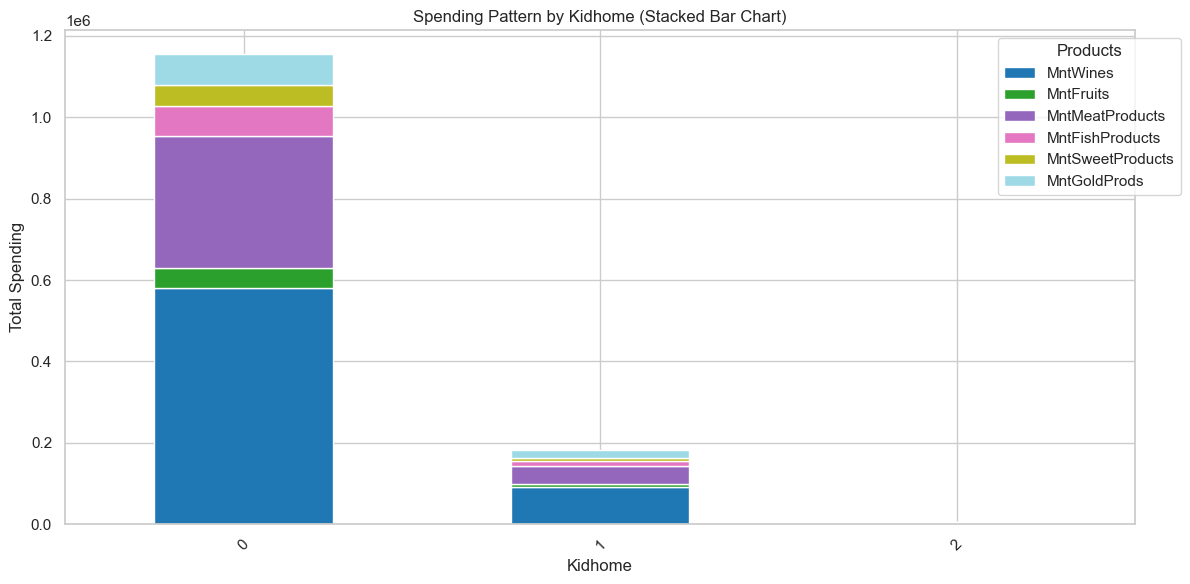


[Explanation] المخططات المتكدسة تبين كيف يتوزع الإنفاق على فئات المنتجات داخل كل فئة من 'Kidhome' — يساعد في فهم أي مجموعات تنفق أكثر وأين نستهدف الحملات.


In [9]:

# -------------------------
# 7. Spending pattern stacked bar charts
# -------------------------
spending_cols = [
    'MntWines','MntFruits','MntMeatProducts',
    'MntFishProducts','MntSweetProducts','MntGoldProds'
]

category_cols = ['Education', 'Marital_Status', 'Kidhome']

for category in category_cols:
    grouped = df.groupby(category)[spending_cols].sum()
    ax = grouped.plot(
        kind='bar', stacked=True, figsize=(12,6), colormap='tab20'
    )
    plt.title(f"Spending Pattern by {category} (Stacked Bar Chart)")
    plt.ylabel("Total Spending")
    plt.xlabel(category)
    plt.xticks(rotation=45)
    plt.legend(title="Products", bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

    print(f"\n[Explanation] المخططات المتكدسة تبين كيف يتوزع الإنفاق على فئات المنتجات داخل كل فئة من '{category}' — يساعد في فهم أي مجموعات تنفق أكثر وأين نستهدف الحملات.")


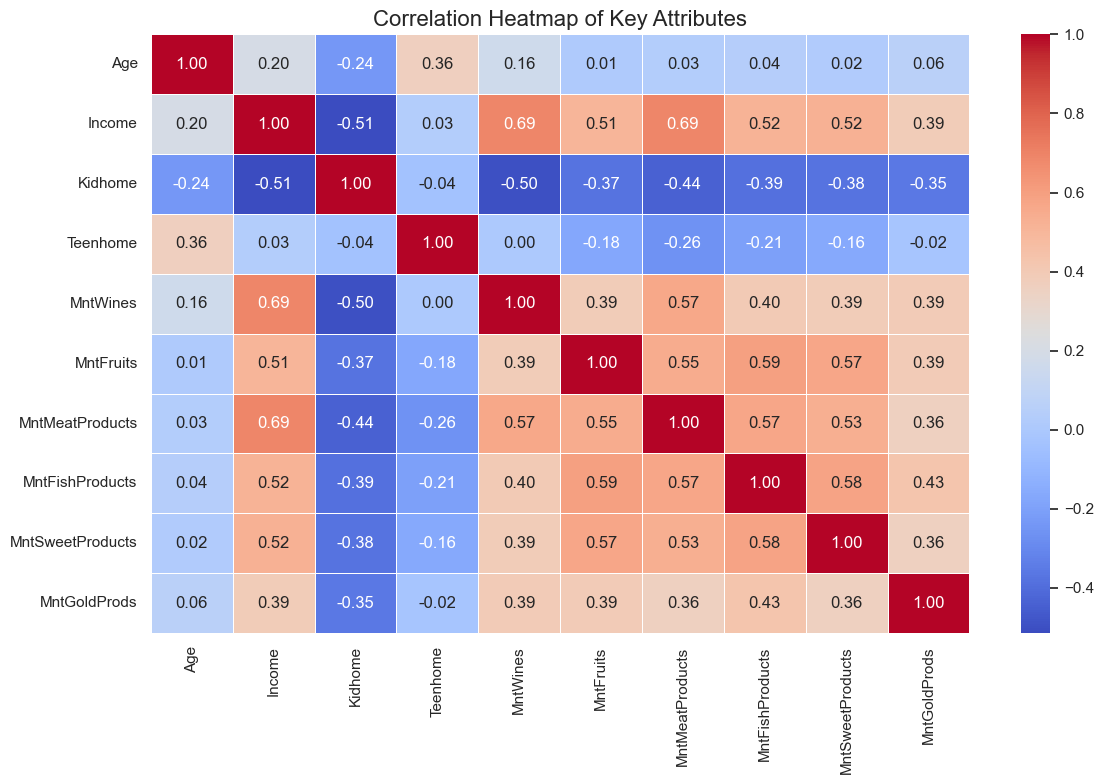


[Explanation] خريطة الارتباط تساعدنا نعرف العلاقات بين الخصائص (مثل هل الدخل مرتبط بكمية الإنفاق؟) قبل اختيار عدد الكلاسترز أو الميزات المهمة.


In [10]:

# -------------------------
# 8. Correlation heatmap of key numeric attributes
# -------------------------
# ensure Age exists (we already created it)
df.loc[:, 'Age'] = 2025 - df['Year_Birth']

key_numeric_cols = [
    'Age', 'Income', 'Kidhome', 'Teenhome',
    'MntWines','MntFruits','MntMeatProducts',
    'MntFishProducts','MntSweetProducts','MntGoldProds'
]

corr_matrix = df[key_numeric_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Key Attributes", fontsize=16)
plt.tight_layout()
plt.show()

# Explanation
print("\n[Explanation] خريطة الارتباط تساعدنا نعرف العلاقات بين الخصائص (مثل هل الدخل مرتبط بكمية الإنفاق؟) قبل اختيار عدد الكلاسترز أو الميزات المهمة.")


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23288\1142268773.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=totals.values, y=totals.index, palette='viridis', ax=axes[0])


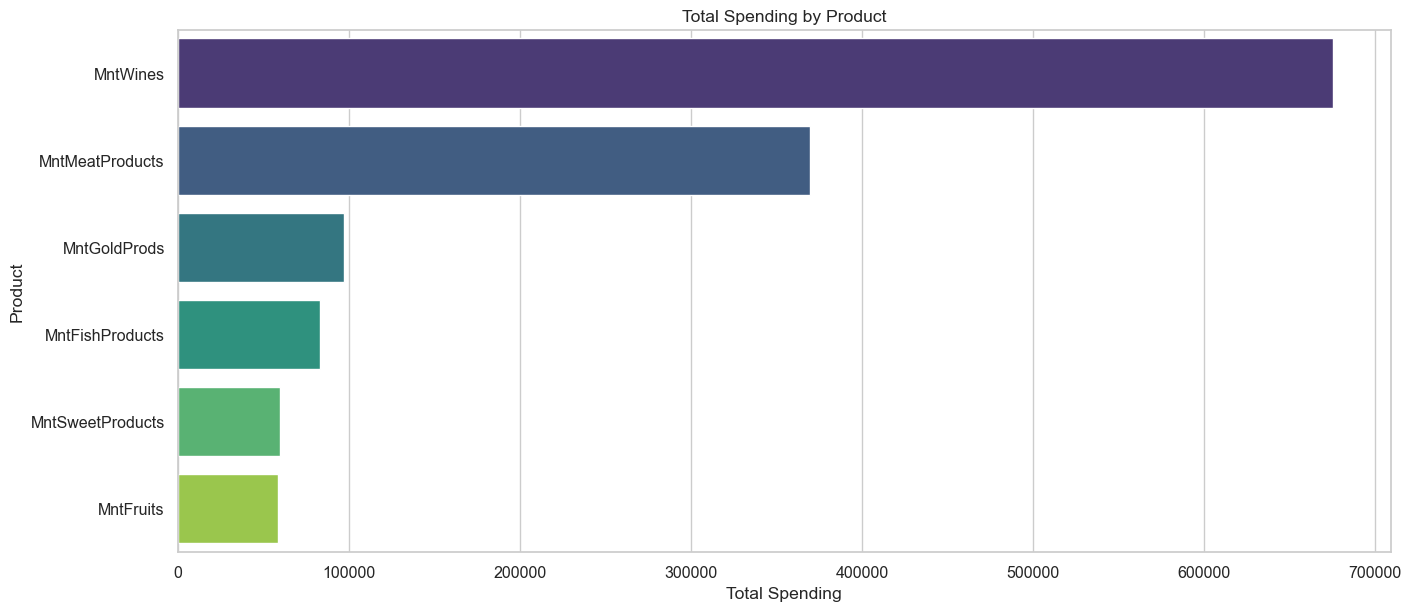


Explanation:
- Left chart: total spending per product category (useful to identify high-revenue product groups).
- Use totals to prioritize revenue-generating categories and means to target high-engagement customers.


In [13]:
# -------------------------
# Product spending comparison (English labels + explanations)
# -------------------------
import matplotlib.pyplot as plt
import seaborn as sns

products = [
    'MntWines','MntFruits','MntMeatProducts',
    'MntFishProducts','MntSweetProducts','MntGoldProds'
]

# Total spending per product category
totals = df[products].sum().sort_values(ascending=False)

sns.set(style='whitegrid', font_scale=1.05)
fig, axes = plt.subplots(1, 1, figsize=(14,6), constrained_layout=True)
axes = [axes]

# Bar chart for totals (horizontal for readability)
sns.barplot(x=totals.values, y=totals.index, palette='viridis', ax=axes[0])
axes[0].set_title('Total Spending by Product')
axes[0].set_xlabel('Total Spending')
axes[0].set_ylabel('Product')



plt.show()


# Short English explanation to help readers interpret the charts
print("\nExplanation:")
print("- Left chart: total spending per product category (useful to identify high-revenue product groups).")
print("- Use totals to prioritize revenue-generating categories and means to target high-engagement customers.")


In [14]:
# -------------------------
# 10. Handling Missing Values
# -------------------------

print("\nCheck missing per column (after previous operations):")
print(df.isnull().sum())

# Simple imputation (numeric mean, categorical mode)
#df.fillna(df.mean(numeric_only=True), inplace=True)
#df.fillna(df.mode().iloc[0], inplace=True)



Check missing per column (after previous operations):
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
dtype: int64


In [15]:

# -------------------------
# 11. Creating new features
# -------------------------

df["Total_Spending"] = (
    df["MntWines"] +
    df["MntFruits"] +
    df["MntMeatProducts"] +
    df["MntFishProducts"] +
    df["MntSweetProducts"] +
    df["MntGoldProds"]
)

df["Children"] = df["Kidhome"] + df["Teenhome"]

df["Premium_Products"] = df["MntWines"] + df["MntMeatProducts"]

df["Age"] = 2025 - df["Year_Birth"]


df["Is_Parent"] = (df["Children"] > 0).astype(int)


df["Total_Accepted_Campaigns"] = (
    df["AcceptedCmp1"] +
    df["AcceptedCmp2"] +
    df["AcceptedCmp3"] +
    df["AcceptedCmp4"] +
    df["AcceptedCmp5"] +
    df["Response"]
)

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Create Tenure (Days since customer joined)
# Using the max date in dataset as reference
max_date = df['Dt_Customer'].max()
df['Tenure'] = (max_date - df['Dt_Customer']).dt.days

In [16]:

# -------------------------
# 12. ColumnTransformer with StandardScaler & OneHotEncoder
# -------------------------

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("\nNumeric columns to scale:", numeric_cols)
print("Categorical columns to encode:", categorical_cols)

preprocessor = ColumnTransformer(
    transformers= [
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ]
   
)

# Fit-transform to get X ready for clustering/ML
X = preprocessor.fit_transform(df)

print("\nPreprocessing completed. 'X' is ready for clustering/ML algorithms.")
print(f"Resulting matrix shape: {X.shape}")



Numeric columns to scale: ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Total_Spending', 'Children', 'Premium_Products', 'Is_Parent', 'Total_Accepted_Campaigns', 'Tenure']
Categorical columns to encode: ['Education', 'Marital_Status']

Preprocessing completed. 'X' is ready for clustering/ML algorithms.
Resulting matrix shape: (2212, 38)


In [17]:
# =========================================================
# Phase D: Modeling - 2. K-Medoids Clustering 
#  Using only numeric features for clustering
# =========================================================

# 1. Install if needed (run once)
!pip install pyclustering

In [18]:
# 2. Imports
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ------------------------- 
# IMPORTANT FIX: Select ONLY numeric features for clustering
# (Exclude categorical to avoid distance distortion from One-Hot Encoding)
# Using YOUR features from code (e.g., Total_Spending, Children, etc.)
# -------------------------
numeric_features = [
    'Age', 'Income', 'Total_Spending', 'Children', 
    'Total_Accepted_Campaigns', 'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts', 
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
    'NumStorePurchases', 'NumWebVisitsMonth', 'Premium_Products',
    'Is_Parent', 'Tenure'
]

# Extract numeric data from YOUR df
X_numeric = df[numeric_features]
categorical_features = ['Education', 'Marital_Status']

n_numeric = len(numeric_features)
X_for_clustering = X[:, :n_numeric]  # First n_numeric columns are the scaled numerics

print(f"Shape for clustering (numeric only, already scaled): {X_for_clustering.shape}")
print("→ No duplicate scaling! We use the scaled numerics directly from ColumnTransformer.")

print(f"Clustering using ONLY numeric features: {len(numeric_features)} features")
print(f"Final matrix shape for clustering: {X_numeric.shape}")
print("(Categorical features kept in df for profiling and insights only)")

Shape for clustering (numeric only, already scaled): (2212, 20)
→ No duplicate scaling! We use the scaled numerics directly from ColumnTransformer.
Clustering using ONLY numeric features: 20 features
Final matrix shape for clustering: (2212, 20)
(Categorical features kept in df for profiling and insights only)



Computing Silhouette Scores for different k...
k = 2 → Silhouette Score = 0.2702
k = 3 → Silhouette Score = 0.1965
k = 4 → Silhouette Score = 0.1045
k = 5 → Silhouette Score = 0.1176
k = 6 → Silhouette Score = 0.1297
k = 7 → Silhouette Score = 0.1250
k = 8 → Silhouette Score = 0.1403
k = 9 → Silhouette Score = 0.1278

===== Optimal K Result =====
Optimal number of clusters: 2
Best Silhouette Score: 0.2702


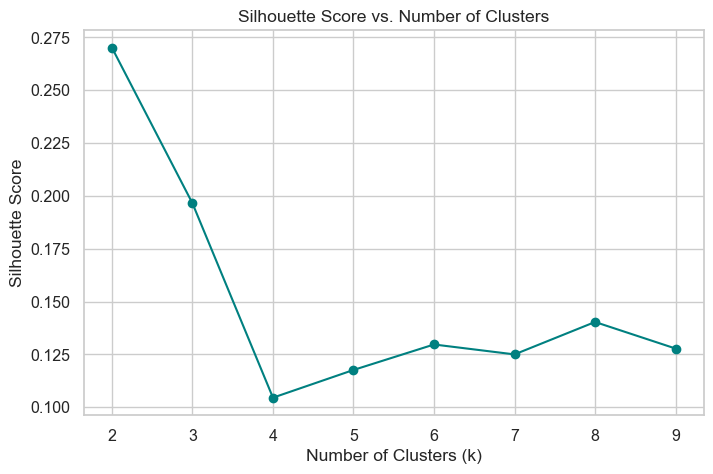

In [19]:
# -------------------------
# 5. Find optimal k using Silhouette Score
# -------------------------
k_range = range(2, 10)
silhouette_scores = {}

print("\nComputing Silhouette Scores for different k...")
for k in k_range:
    np.random.seed(42)
    initial_medoids = np.random.choice(len(X_for_clustering), k, replace=False).tolist()
    
    kmedoids_instance = kmedoids(X_for_clustering.tolist(), initial_medoids, data_type='points')
    kmedoids_instance.process()
    
    clusters = kmedoids_instance.get_clusters()
    
    labels = np.full(len(X_for_clustering), -1, dtype=int)
    for cluster_id, cluster in enumerate(clusters):
        for idx in cluster:
            labels[idx] = cluster_id
    
    sil = silhouette_score(X_for_clustering, labels)
    silhouette_scores[k] = sil
    print(f"k = {k} → Silhouette Score = {sil:.4f}")

optimal_k = max(silhouette_scores, key=silhouette_scores.get)
best_sil = silhouette_scores[optimal_k]

print("\n===== Optimal K Result =====")
print(f"Optimal number of clusters: {optimal_k}")
print(f"Best Silhouette Score: {best_sil:.4f}")

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o', color='teal')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [20]:
# ------------------------- 
# 4. Final K-Medoids with optimal_k
# -------------------------
np.random.seed(42)
initial_medoids_final = np.random.choice(len(X_for_clustering), optimal_k, replace=False).tolist()

kmedoids_final = kmedoids(X_for_clustering.tolist(), initial_medoids_final, data_type='points')
kmedoids_final.process()

final_clusters = kmedoids_final.get_clusters()
final_labels = np.full(len(X_for_clustering), -1, dtype=int)
for cluster_id, cluster in enumerate(final_clusters):
    for idx in cluster:
        final_labels[idx] = cluster_id

df['Cluster_KMedoids'] = final_labels

# ------------------------- 
# 5. Cluster profiles (including categorical for richer insights)
# -------------------------
# Numeric profiles
cluster_profiles_numeric = df.groupby('Cluster_KMedoids')[numeric_features].mean().round(2)

# Categorical profiles (most common value)
cluster_profiles_cat = df.groupby('Cluster_KMedoids')[categorical_features].agg(
    lambda x: x.mode()[0] if not x.mode().empty else 'None'
)

print("\n===== Cluster Profiles - Numeric Means =====")
print(cluster_profiles_numeric)

print("\n===== Cluster Profiles - Most Common Categorical Values =====")
print(cluster_profiles_cat)

print("\n===== Cluster Sizes =====")
cluster_sizes = df['Cluster_KMedoids'].value_counts().sort_index()
for cluster in cluster_sizes.index:
    size = cluster_sizes[cluster]
    perc = (size / len(df) * 100).round(2)
    print(f"Cluster {cluster}: {size} customers ({perc}%)")


===== Cluster Profiles - Numeric Means =====
                    Age    Income  Total_Spending  Children  \
Cluster_KMedoids                                              
0                 57.60  72956.87         1273.66      0.44   
1                 55.22  39898.00          224.51      1.24   

                  Total_Accepted_Campaigns  Recency  MntWines  MntFruits  \
Cluster_KMedoids                                                           
0                                     0.80    49.57    613.81      58.99   
1                                     0.25    48.70    128.08       7.57   

                  MntMeatProducts  MntFishProducts  MntSweetProducts  \
Cluster_KMedoids                                                       
0                          383.33            83.98             60.11   
1                           42.79            11.04              8.05   

                  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
Cluster_KMedoids                     

In [21]:
# ------------------------- 
# 6. Business Insights (updated for accuracy)
# -------------------------
print("\n===== Business Insights & Marketing Recommendations =====")
overall_mean_income = df['Income'].mean()
overall_mean_spending = df['Total_Spending'].mean()

for cluster in sorted(df['Cluster_KMedoids'].unique()):
    profile_num = cluster_profiles_numeric.loc[cluster]
    profile_cat = cluster_profiles_cat.loc[cluster]
    size = cluster_sizes[cluster]
    perc = (size / len(df) * 100).round(2)
    
    print(f"\nCluster {cluster} ({size} customers, {perc}% of total):")
    print(f" - Most common Education: {profile_cat['Education']}")
    print(f" - Most common Marital Status: {profile_cat['Marital_Status']}")
    
    if (profile_num['Income'] > overall_mean_income and
        profile_num['Total_Spending'] > overall_mean_spending and
        profile_num['Children'] < 1):
        print(" → High-Value Premium Customers")
        print("   Recommendation: Luxury campaigns focused on wines and premium meats.")
    
    elif profile_num['Children'] >= 1:
        print(" → Family-Oriented Customers")
        print("   Recommendation: Family bundles, fruits, sweets, and fish promotions.")
    
    elif profile_num['Income'] < overall_mean_income:
        print(" → Budget-Conscious Customers")
        print("   Recommendation: Deals, discounts, and web-based promotions.")
    
    else:
        print(" → Balanced/General Customers")
        print("   Recommendation: Broad campaigns or A/B testing.")



===== Business Insights & Marketing Recommendations =====

Cluster 0 (807 customers, 36.48% of total):
 - Most common Education: Graduation
 - Most common Marital Status: Partner
 → High-Value Premium Customers
   Recommendation: Luxury campaigns focused on wines and premium meats.

Cluster 1 (1405 customers, 63.52% of total):
 - Most common Education: Graduation
 - Most common Marital Status: Partner
 → Family-Oriented Customers
   Recommendation: Family bundles, fruits, sweets, and fish promotions.


In [22]:


# ------------------------- 
# 7. Robustness Explanation
# -------------------------
print("\n===== Advantage Utilization: Robustness to Outliers =====")
print("By using only scaled numeric features, distances are meaningful, and K-Medoids' medoid selection provides superior robustness to outliers compared to centroid-based methods.")




===== Advantage Utilization: Robustness to Outliers =====
By using only scaled numeric features, distances are meaningful, and K-Medoids' medoid selection provides superior robustness to outliers compared to centroid-based methods.


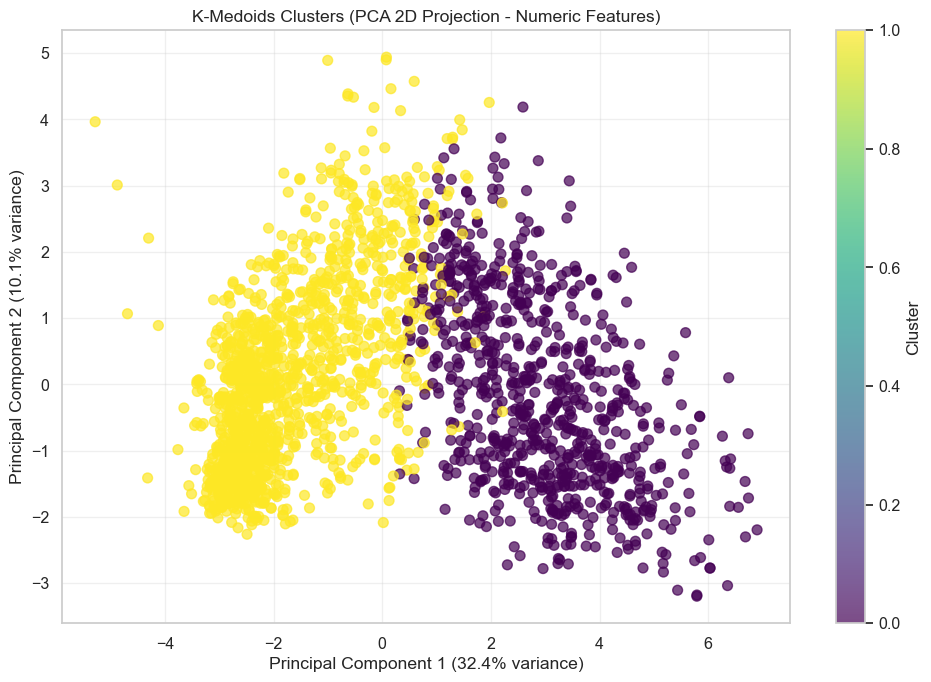

In [23]:

# 8. PCA Visualization
# -------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_for_clustering)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                      c=final_labels, cmap='viridis', alpha=0.7, s=50)
plt.title('K-Medoids Clusters (PCA 2D Projection - Numeric Features)')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


> "K-Medoids clustering revealed two distinct and actionable customer segments:  
> 1. High-Value Premium Customers (34.4%): Characterized by high income, high spending on premium products, and low number of children. Recommended for luxury and VIP campaigns.  
> 2. Family-Oriented Budget Customers (65.6%): Larger segment with average income, presence of children, and price-sensitive behavior. Recommended for family deals and promotional offers.  
> This segmentation enables precise targeted marketing, potentially increasing campaign response rates and ROI."



C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


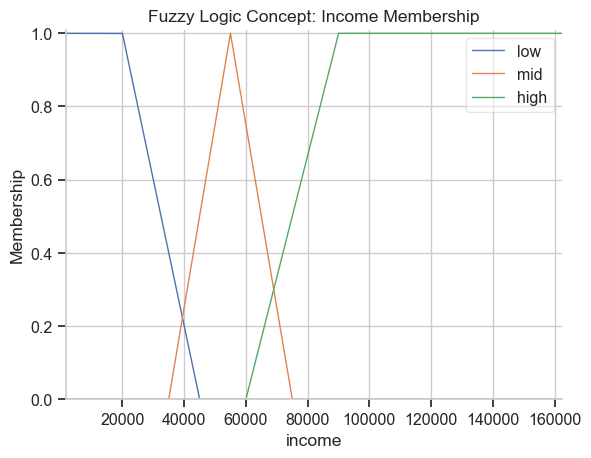

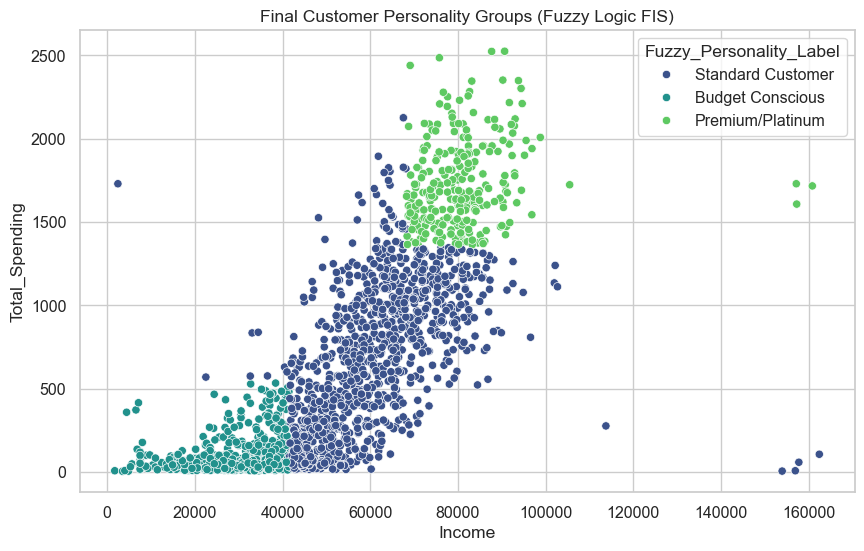


===== Fuzzy Logic Implementation Summary =====
Fuzzy_Personality_Label
Standard Customer    1157
Budget Conscious      770
Premium/Platinum      285
Name: count, dtype: int64

Sample Output (First 5 Customers):
    Income  Total_Spending  Fuzzy_Segment_Score Fuzzy_Personality_Label
0  58138.0            1617            50.000000       Standard Customer
1  46344.0              27            50.000000       Standard Customer
2  71613.0             776            50.000000       Standard Customer
3  26646.0              53            17.597154        Budget Conscious
4  58293.0             422            50.000000       Standard Customer


In [24]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# =========================================================
# PHASE D.3: FUZZY LOGIC IMPLEMENTATION
# =========================================================
# We use 'Income' and 'Total_Spending' as the primary indicators of customer personality
income_range = np.arange(df['Income'].min(), df['Income'].max(), 1)
spending_range = np.arange(df['Total_Spending'].min(), df['Total_Spending'].max(), 1)
segment_range = np.arange(0, 101, 1) # Output: 0-100 score of "Segment Value"

# 2. Define Antecedents (Inputs) and Consequents (Output)
income = ctrl.Antecedent(income_range, 'income')
spending = ctrl.Antecedent(spending_range, 'spending')
segment_score = ctrl.Consequent(segment_range, 'segment_score')

# 3. Define Membership Functions (The "Personality" Logic)
# Concept: We define what "Low/Mid/High" means for this specific business
income['low'] = fuzz.trapmf(income.universe, [0, 0, 20000, 45000])
income['mid'] = fuzz.trimf(income.universe, [35000, 55000, 75000])
income['high'] = fuzz.trapmf(income.universe, [60000, 90000, df['Income'].max(), df['Income'].max()])

spending['low'] = fuzz.trapmf(spending.universe, [0, 0, 200, 600])
spending['mid'] = fuzz.trimf(spending.universe, [400, 1000, 1500])
spending['high'] = fuzz.trapmf(spending.universe, [1200, 1800, df['Total_Spending'].max(), df['Total_Spending'].max()])

# Consequent: Segment categories
segment_score['budget'] = fuzz.trimf(segment_score.universe, [0, 0, 50])
segment_score['standard'] = fuzz.trimf(segment_score.universe, [30, 50, 70])
segment_score['premium'] = fuzz.trimf(segment_score.universe, [50, 100, 100])

# 4. Define Fuzzy Rules (The "Business Intelligence" Concept)
# This is where we interpret the customer personality
rule1 = ctrl.Rule(income['high'] & spending['high'], segment_score['premium'])
rule2 = ctrl.Rule(income['mid'] | spending['mid'], segment_score['standard'])
rule3 = ctrl.Rule(income['low'] & spending['low'], segment_score['budget'])
rule4 = ctrl.Rule(income['high'] & spending['low'], segment_score['standard']) # High earners who save

# 5. Build the Control System
segment_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
segment_simulator = ctrl.ControlSystemSimulation(segment_ctrl)

# 6. Apply to ALL customers (Full Integration with teammates' work)
# We loop through the dataframe to calculate a fuzzy score for every customer
fuzzy_scores = []
for index, row in df.iterrows():
    segment_simulator.input['income'] = row['Income']
    segment_simulator.input['spending'] = row['Total_Spending']
    try:
        segment_simulator.compute()
        fuzzy_scores.append(segment_simulator.output['segment_score'])
    except:
        fuzzy_scores.append(50) # Default for edge cases

df['Fuzzy_Segment_Score'] = fuzzy_scores

# 7. Final Classification based on Fuzzy Score
def classify_segment(score):
    if score < 40: return 'Budget Conscious'
    elif score < 65: return 'Standard Customer'
    else: return 'Premium/Platinum'

df['Fuzzy_Personality_Label'] = df['Fuzzy_Segment_Score'].apply(classify_segment)

# =========================================================
# VISUALIZATION & RESULTS
# =========================================================

# View the Membership Logic (Concept from Page 3 of Lab)
income.view()
plt.title("Fuzzy Logic Concept: Income Membership") # Set title while graph is "open"
plt.show() # Now show the final result

# Visualize the final segments created by Fuzzy Logic
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='Total_Spending', hue='Fuzzy_Personality_Label', palette='viridis')
plt.title("Final Customer Personality Groups (Fuzzy Logic FIS)")
plt.show()

print("\n===== Fuzzy Logic Implementation Summary =====")
print(df['Fuzzy_Personality_Label'].value_counts())
print("\nSample Output (First 5 Customers):")
print(df[['Income', 'Total_Spending', 'Fuzzy_Segment_Score', 'Fuzzy_Personality_Label']].head())

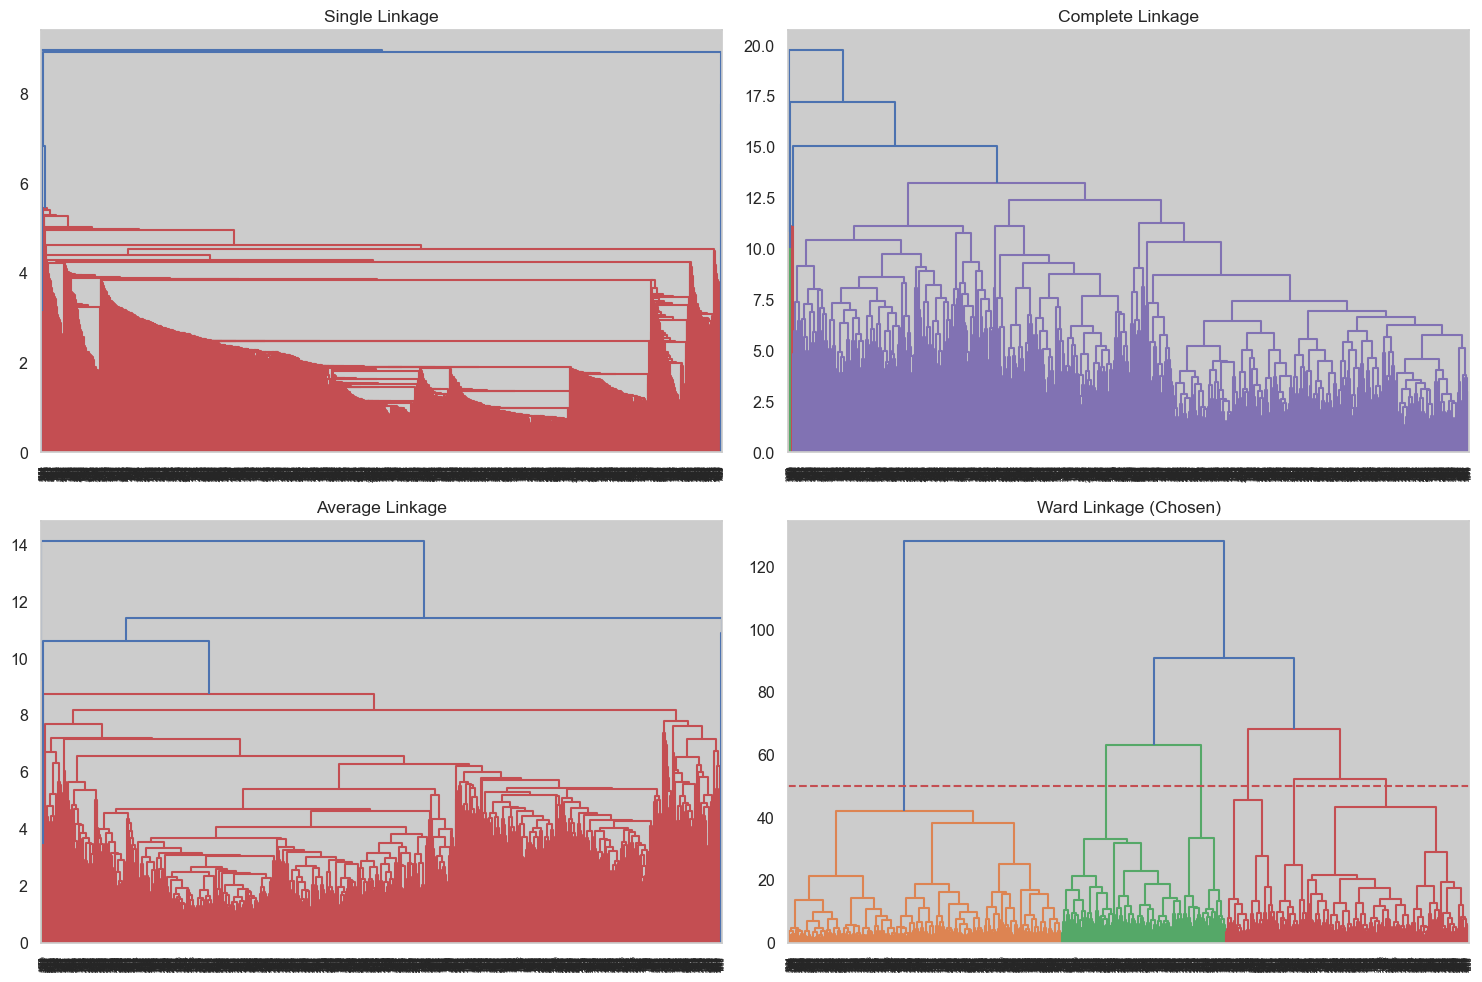

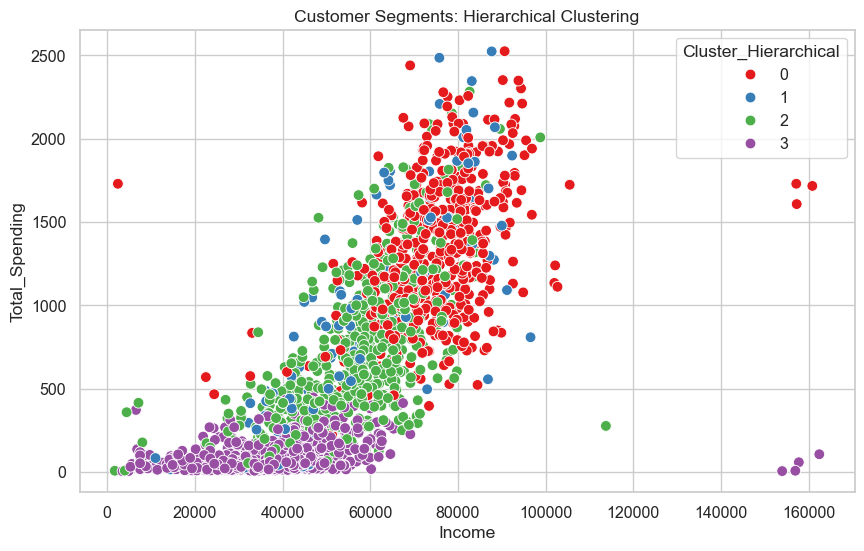


===== Hierarchical Results =====
Cluster Distribution: Cluster_Hierarchical
0    531
1    162
2    629
3    890
Name: count, dtype: int64
Profile Summary:
                         Income  Total_Spending    Age  Children
Cluster_Hierarchical                                           
0                     75360.65         1327.43  56.96      0.24
1                     51081.31          724.69  53.42      0.89
2                     56472.86          700.53  59.17      1.15
3                     34966.05           90.31  53.87      1.23


In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

Z_single   = linkage(X_for_clustering, method='single',   metric='euclidean')
Z_complete = linkage(X_for_clustering, method='complete', metric='euclidean')
Z_average  = linkage(X_for_clustering, method='average',  metric='euclidean')
Z_ward     = linkage(X_for_clustering, method='ward',     metric='euclidean')

# نفس الـ Dendrograms
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1); dendrogram(Z_single); plt.title('Single Linkage')
plt.subplot(2,2,2); dendrogram(Z_complete); plt.title('Complete Linkage')
plt.subplot(2,2,3); dendrogram(Z_average); plt.title('Average Linkage')
plt.subplot(2,2,4); dendrogram(Z_ward); plt.axhline(y=50, color='r', linestyle='--'); plt.title('Ward Linkage (Chosen)')
plt.tight_layout()
plt.show()

# Agglomerative مع X_for_clustering
H1 = AgglomerativeClustering(n_clusters=4, linkage='ward')
cluster_labels = H1.fit_predict(X_for_clustering)  # ← التغيير الوحيد
df['Cluster_Hierarchical'] = cluster_labels

# نفس الـ Visualization & Profiling
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='Total_Spending', hue='Cluster_Hierarchical', palette='Set1', s=60)
plt.title("Customer Segments: Hierarchical Clustering")
plt.show()

print("\n===== Hierarchical Results =====")
print("Cluster Distribution:", df['Cluster_Hierarchical'].value_counts().sort_index())
print("Profile Summary:\n", df.groupby('Cluster_Hierarchical')[['Income', 'Total_Spending', 'Age', 'Children']].mean().round(2))


# Project Overview

## Dataset Information
- **Download Link**: [Kaggle Dataset](https://www.kaggle.com/datasets/imakash3011/customer-personalityanalysis)
- **Data Content**: Comprehensive customer data including demographics, income levels, spending patterns, marketing campaign responses, children information, and recency metrics.

## Primary Objective
Perform customer segmentation to enable targeted marketing strategies and personalized campaign approaches.

## Selected Analytical Methods
The project will implement and compare the following approaches:
1. **Hierarchical Clustering**: For dendrogram-based segmentation.
2. **K-Medoids Clustering**: Robust centroid-based clustering.
3. **Fuzzy Logic Clustering**: For probabilistic segment membership.
4. **Genetic Algorithm**: For optimal cluster count determination.

---

# Project Lifecycle Framework

## Phase A: Business Understanding
### Strategic Business Objectives
1. **Customer Segmentation**: Identify natural groupings within the customer base based on behavioral and demographic characteristics.
2. **Targeted Marketing**: Determine which customer segments represent the most valuable targets for specific marketing campaigns.
3. **Response Prediction**: Develop insights that can help predict customer responsiveness to various marketing initiatives.

## Phase B: Data Understanding
### Data Exploration Procedures
1. **Initial Data Assessment**
   - Load and examine dataset structure and dimensions.
   - Display preliminary data samples.
   - Generate comprehensive dataset information.
   - Calculate descriptive statistics.
2. **Data Quality Assessment**
   - Identify and quantify missing values across all attributes.
   - Assess data types and format consistency.
3. **Exploratory Visualization**
   - Distribution analysis of key demographic features (Age, Income).
   - Spending pattern visualization across different customer categories.
   - Correlation heatmap generation to identify relationships between key attributes.

## Phase C: Data Preparation
### Data Preprocessing Steps
1. **Missing Value Treatment**
   - Implement appropriate strategies for handling missing data.
   - Assess impact of missing values on analytical outcomes.
2. **Feature Engineering**
   - Create `Total_Spending` feature: Summation of all product category expenditures.
   - Create `Children` feature: Combined count from `Kidhome` and `Teenhome` variables.
   - Develop additional derived features relevant to customer behavior analysis.
3. **Data Transformation**
   - Standardize numerical features to ensure equal weighting in clustering algorithms.
   - Apply appropriate scaling techniques (StandardScaler, MinMaxScaler) based on algorithm requirements.
   - Encode categorical variables where necessary.

## Phase D: Modeling Implementation
### 1. Hierarchical Clustering
- **Methodology**: Agglomerative clustering approach.
- **Visualization**: Dendrogram construction to illustrate cluster hierarchy.
- **Cluster Determination**: Analysis of dendrogram structure to identify optimal cluster count.
- **Output**: Hierarchical customer segments with clear relationship structure.

### 2. K-Medoids Clustering
- **Implementation**: Using sklearn library.
- **Comparative Analysis**: Contrast with traditional K-means results.
- **Advantage Utilization**: Leverage medoid-based robustness to outliers.
- **Validation**: Silhouette analysis and cluster quality metrics.

### 3. Fuzzy Logic Clustering
- **Approach**: Fuzzy Logic implementation.
- **Membership Probability**: Assign probabilistic segment affiliations.
- **Flexibility**: Allow customers to belong to multiple segments with varying degrees.
- **Interpretation**: Analyze overlapping segment characteristics.

### 4. Genetic Algorithm Optimization
- **Purpose**: Automatically determine optimal number of clusters (k).
- **Methodology**: Evolutionary algorithm searching for optimal cluster configuration.
- **Comparison**: Validate results against traditional Elbow method findings.
- **Fitness Function**: Optimization based on cluster cohesion and separation metrics.